# Step-1: Loading Data

In [1]:
import numpy as np #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
currentdir = os.getcwd() #Get current Working Directory
currentdir = currentdir[:len(currentdir)-11] # Replacing The Current directory
currentdir += "Datasets/archive/" #Directory Of Dataset Used
file1 = currentdir + "A_test_data.csv" #File name
df1 = pd.read_csv(file1) #Reading The File
df1.head() #Displaying the file

,id,account,IP,url,port,vlan,switchIP,time
0,1,xiaojiawei@qq.com,192.168.2.130,http://service.foxmail.com,26616,700,168.8.42.39,2021/6/5 8:31
1,2,xiaojiawei@qq.com,192.168.12.132,http://101.199.128.175,17175,700,127.51.2.53,2021/6/15 6:05
2,3,xiaojiawei@qq.com,192.168.10.5,http://news.sohu.com,33385,700,130.2.2.12,2021/5/10 6:42
3,4,xiaojiawei@qq.com,192.168.8.27,http://www.hostbuf.com,11188,700,121.9.3.251,2021/5/18 7:50
4,5,xiaojiawei@qq.com,192.168.16.243,http://p2.so.qhimgs1.com,15788,700,168.8.42.39,2021/6/17 8:09


In [3]:
file2 = currentdir + "train_data.csv" #File name
df2 = pd.read_csv(file2) #Reading The File
df2.head() #Displaying the file

,id,account,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,2021/6/16 7:56,0.1149
1,2,xiaojiawei@qq.com,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,2021/6/28 7:58,0.1801
2,3,xiaojiawei@qq.com,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,2021/6/1 6:37,0.3690
3,4,xiaojiawei@qq.com,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,2021/5/5 8:18,0.1532
4,5,xiaojiawei@qq.com,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,2021/6/20 6:52,0.1449


# Step-2: Gathering Info about data

In [4]:
df1.isnull().sum()

id          0
account     0
IP          0
url         0
port        0
vlan        0
switchIP    0
time        0
dtype: int64

# Step-3: Preprocessing

In [5]:
from datetime import datetime #Converting Object in time column into a Unix Time stamp
def conv_to_timestamp(date_string):
    date_object= datetime.strptime(date_string, "%Y/%m/%d %H:%M")
    return int(date_object.timestamp())/10**9

df1['time'] = df1['time'].apply(conv_to_timestamp)
df2['time'] = df2['time'].apply(conv_to_timestamp)

In [6]:
df1.head()

,id,account,IP,url,port,vlan,switchIP,time
0,1,xiaojiawei@qq.com,192.168.2.130,http://service.foxmail.com,26616,700,168.8.42.39,1.622862
1,2,xiaojiawei@qq.com,192.168.12.132,http://101.199.128.175,17175,700,127.51.2.53,1.623717
2,3,xiaojiawei@qq.com,192.168.10.5,http://news.sohu.com,33385,700,130.2.2.12,1.620609
3,4,xiaojiawei@qq.com,192.168.8.27,http://www.hostbuf.com,11188,700,121.9.3.251,1.621304
4,5,xiaojiawei@qq.com,192.168.16.243,http://p2.so.qhimgs1.com,15788,700,168.8.42.39,1.623898


In [7]:
df2.head()

,id,account,IP,url,port,vlan,switchIP,time,ret
0,1,xiaojiawei@qq.com,192.168.1.50,http://123.6.4.41,15788,700,129.30.06.37,1.623810,0.1149
1,2,xiaojiawei@qq.com,192.168.31.46,http://104.192.108.154,12665,700,152.91.89.45,1.624847,0.1801
2,3,xiaojiawei@qq.com,192.168.2.3,http://42.236.37.80,25551,700,129.30.06.37,1.622510,0.3690
3,4,xiaojiawei@qq.com,192.168.145.30,http://uf-api6-client.ksord.com,18274,700,162.6.8.29,1.620183,0.1532
4,5,xiaojiawei@qq.com,192.168.178.92,http://101.199.128.170,34572,700,162.0.1.84,1.624152,0.1449


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['IP'] = le.fit_transform(df1['IP']) #Applying Label Encoder on IP
df2['IP'] = le.fit_transform(df2['IP'])

df1['switchIP'] = le.fit_transform(df1['switchIP']) #Applying Label Encoder on switchIP
df2['switchIP'] = le.fit_transform(df2['switchIP'])

df1['account'] = le.fit_transform(df1['account']) #Applying Label Encoder on account
df2['account'] = le.fit_transform(df2['account'])

df1['url'] = le.fit_transform(df1['url']) #Applying Label Encoder on url
df2['url'] = le.fit_transform(df2['url']) 


In [9]:
from sklearn.preprocessing import StandardScaler #Perform normalization
scaler = StandardScaler()

columns = ['port','vlan','time']
df1[columns] = scaler.fit_transform(df1[columns])
df2[columns] = scaler.fit_transform(df2[columns])

<Axes: >

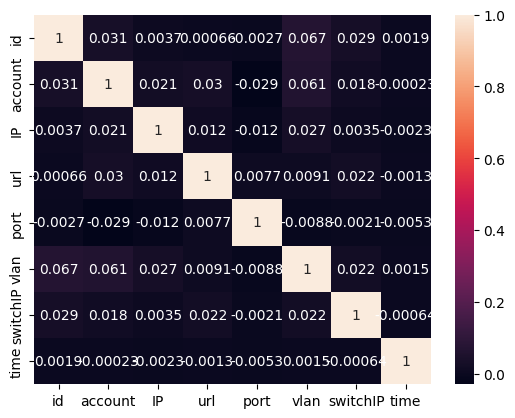

In [11]:
import seaborn as sns
matrix = df1.corr()
sns.heatmap(matrix,annot=True)

<Axes: >

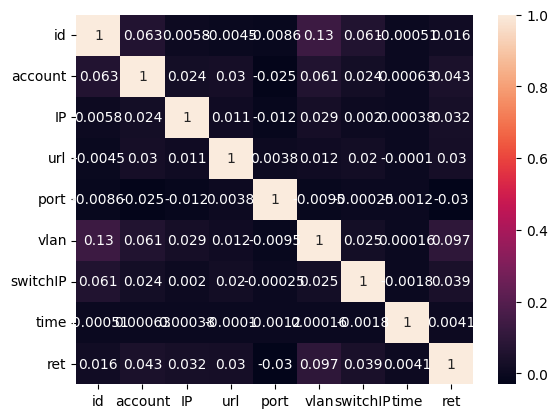

In [12]:
matrix = df2.corr()
sns.heatmap(matrix,annot=True)

# Step-4 Applying Techniques

In [13]:
from sklearn.ensemble import IsolationForest #Using Isolation Forest
isf = IsolationForest(contamination='auto', random_state=120)

features_train = ['port','IP','vlan','id'] #Selecting training features
X_train = df2[features_train]

features_test = ['port','IP','vlan','url']
X_test = df1[features_test]

isf.fit(X_train) #Fitting the model with training data
predictions = isf.predict(X_test)
anomaly_scores = isf.decision_function(X_test)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1

In [14]:
predictions

array([1, 1, 0, ..., 0, 0, 1])

In [15]:
anomaly_scores

array([-0.00561109, -0.05319994,  0.00041869, ...,  0.0344594 ,
        0.00263769, -0.02888647])

# Step-5: Visualization

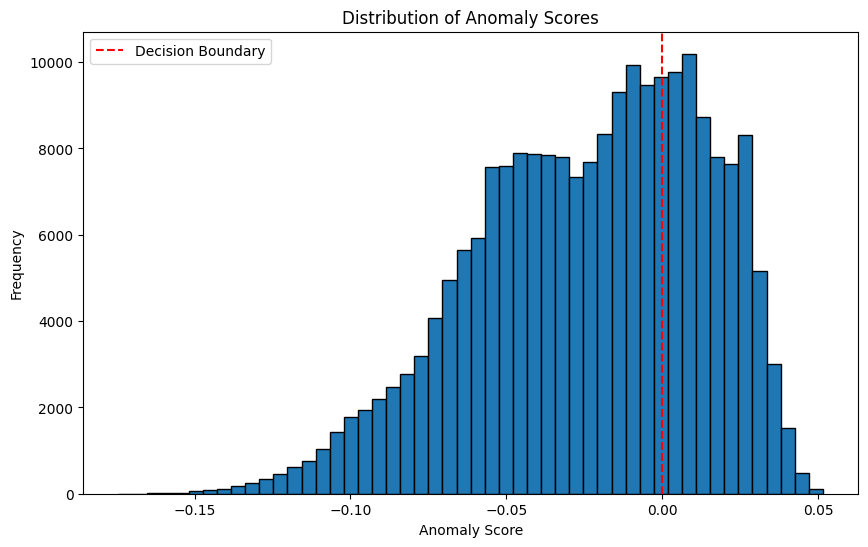

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, edgecolor='k')
plt.axvline(0, color='r', linestyle='--', label='Decision Boundary')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()


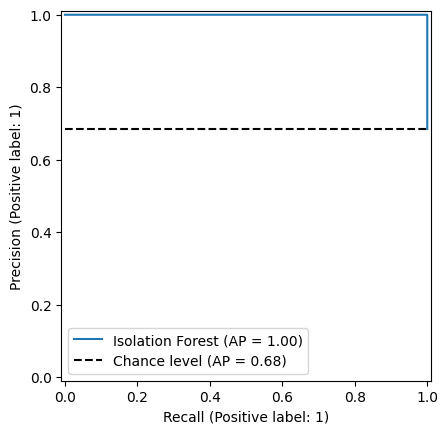

In [17]:
from sklearn.metrics import PrecisionRecallDisplay
y_true = predictions
y_score = -anomaly_scores
display = PrecisionRecallDisplay.from_predictions(y_true,y_score,name="Isolation Forest", plot_chance_level=True)